#  Linear Discriminant Analysis (LDA) tutorial

Notes from: [link 1](https://machinelearningmastery.com/linear-discriminant-analysis-for-machine-learning/), [link 2](https://www.python-course.eu/linear_discriminant_analysis.php)

- Logistic regression classification is hardly applied to two-class problems.
- LDA classification can be used for multi-class problems.
- LDA searches for a projection of a dataset which maximizes the 'between class scatter to within class scatter' $\left(\frac{S_B}{S_W}\right)$ ratio of this projected dataset.
- The goal is transform a dataset $A$ using a transformation matrix $w$ such that the between-class-scatter to within-class-scatter ratio $Y=w^T\cdot A$ is maximized.
- Formally, find the linear combination $Z=a^T\cdot X$ such that the between class variance is maximized relative to the within class variance.
- LDA makes the assumption that the distribution of the data is Gaussian
- LDA consists of statistical properties of your data, calculated for each class.
- For single variable class, the statistical properties that are calculated are the mean and variance.
- For multiple variables, the statistical properties are the means and covariance matrix of the multivariate Gaussian.
- An LDA model uses these properties to make predictions.

**Assumptions**
1. That the data is Gaussian.
2. That each attribute has the same variance.

##  Making predictions with LDA
Given an instance $x$, determine which class or category $c$ it belongs to:
\begin{equation}
P(Y=c\mid X=x)=\frac{P(X=x\mid Y=c)P(Y=c)}{\sum_{classes~c}P(X=x\mid Y=c)P(Y=c)}
\end{equation}

##  Maths of LDA

In [14]:
#%%time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import style

In [8]:
%matplotlib inline
style.use('seaborn')
np.random.seed(42)

In [9]:
# contrived data
rectangles = np.array([[1,1.5,1.7,1.45,1.1,1.6,1.8],[1.8,1.55,1.45,1.6,1.65,1.7,1.75]])
triangles = np.array([[0.1,0.5,0.25,0.4,0.3,0.6,0.35,0.15,0.4,0.5,0.48],[1.1,1.5,1.3,1.2,1.15,1.0,1.4,1.2,1.3,1.5,1.0]])
circles = np.array([[1.5,1.55,1.52,1.4,1.3,1.6,1.35,1.45,1.4,1.5,1.48,1.51,1.52,1.49,1.41,1.39,1.6,1.35,1.55,1.47,1.57,1.48,
                    1.55,1.555,1.525,1.45,1.35,1.65,1.355,1.455,1.45,1.55,1.485,1.515,1.525,1.495,1.415,1.395,1.65,1.355,1.555,1.475,1.575,1.485]
                    ,[1.3,1.35,1.33,1.32,1.315,1.30,1.34,1.32,1.33,1.35,1.30,1.31,1.35,1.33,1.32,1.315,1.38,1.34,1.28,1.23,1.25,1.29,
                     1.35,1.355,1.335,1.325,1.3155,1.305,1.345,1.325,1.335,1.355,1.305,1.315,1.355,1.335,1.325,1.3155,1.385,1.345,1.285,1.235,1.255,1.295]])

In [10]:
print(rectangles.shape, triangles.shape, circles.shape)

(2, 7) (2, 11) (2, 44)


### Scatter Within ($S_W$)
$S_W = \sum_{classes~c}\sum_{j\in c}\left(x_j-\mu_c\right)\left(x_j-\mu_c\right)^T$

[[ 1.07646534 -0.05208045]
 [-0.05208045  0.45007299]]


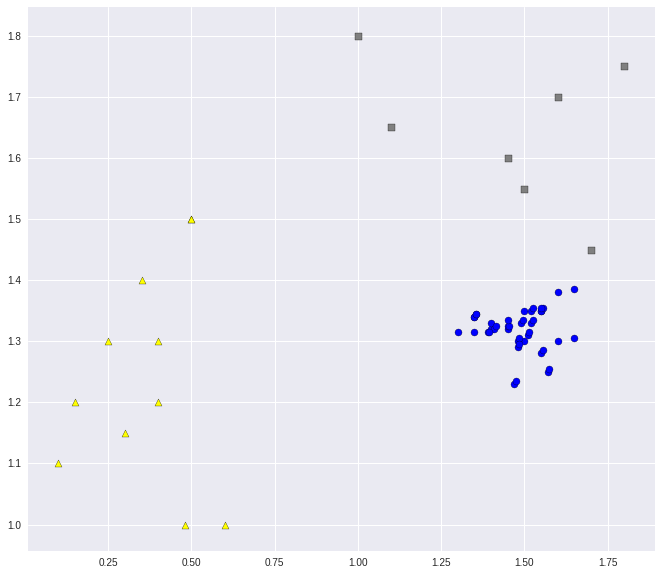

In [11]:
# plot the data
fig = plt.figure(figsize=(10,10))

ax0 = fig.add_subplot(111)
ax0.scatter(rectangles[0], rectangles[1], marker='s', c='grey', edgecolor='black')
ax0.scatter(triangles[0], triangles[1], marker='^', c='yellow', edgecolor='black')
ax0.scatter(circles[0], circles[1], marker='o', c='blue', edgecolor='black')

# Calculate the mean vectors per class
mean_rectangles = np.mean(rectangles, axis=1).reshape(2,1)
mean_triangles = np.mean(triangles, axis=1).reshape(2,1)
mean_circles = np.mean(circles, axis=1).reshape(2,1)

# Calculate the scatter matrices for the SW (Scatter Within) and sum the elements up
scatter_rectangles = np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T)
scatter_triangles = np.dot((triangles-mean_triangles),(triangles-mean_triangles).T)
scatter_circles = np.dot((circles-mean_circles),(circles-mean_circles).T)

# Calculate the SW by adding the scatters within classes
SW = scatter_triangles + scatter_circles + scatter_rectangles
print(SW)
plt.show()

###  Scatter Between ($S_B$)
$S_B=\sum_{classes~c}N_c\left(\mu_c-\mu\right)\left(\mu_c-\mu\right)^T$

Total scatter matrix, $S_T=S_W+\sum_{classes~c}n_c(\mu_c-\mu)(\mu_c-\mu)^T$, where $n_c$ is the number of rows in $c$

If we denote the transformed dataset as $Y$, we find $Y$ with $Y=w^T\cdot X$.

Plugging the transformation matrix $w$ into the $S_W$ and $S_B$ equations we have:
\begin{equation}
S_W = \sum_{classes~c}\sum_{j\in c}\left(w^T\left(x_j-\mu_c\right)\right)\left(w^T\left(x_j-\mu_c\right)\right)^T
= w^TS_Ww
\end{equation}
\begin{equation}
S_B = \sum_{classes~c}N_c\left(w^T\left(x_j-\mu_c\right)\right)\left(w^T\left(x_j-\mu_c\right)\right)^T
= w^TS_Bw
\end{equation}

Therefore, the scatter ratio becomes:
\begin{equation}
\frac{w^TS_Bw}{w^TS_Ww}
\end{equation}

So the **problem** now is: *how to find the $w$ that maximizes this equation.* It turns out that $w=S_W^{-1}S_B$

###  Main steps in LDA
1. Standardize the dataset (zero mean, unit variance)
2. Compute the total mean vector $\mu$ as well as the mean vectors per class $\mu_c$
3. Compute the scatter within and scatter between matrices $S_B$ and $S_W$
4. Compute the eigenvalues  and eigenvectors of $S_W^-1S_B$ to find the $w$ which maximizes $\frac{w^TS_Bw}{w^TS_Ww}$
5. Select the eigenvectors of the corresponding k largest eigenvalues to create a $d\times k$ dimensional transformation matrix $w$ where the eigenvectors are the columns of this matrix.
6. Use $w$ to transform the original $n\times d$ dimensional dataset $x$ into a lower, $n\times k$ dimensional dataset $y$

Dataset: [wine dataset](https://archive.ics.uci.edu/ml/datasets/wine)

**Step 0: Load in the data and split the descriptive and the target feature**

In [51]:
df = pd.read_csv('data/wine.data', sep=',', names=['target','Alcohol','Malic_acid','Ash','Akcakinity','Magnesium','Total_pheonols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280','Proline'])
X = df.iloc[:, 1:].copy()
target = df['target'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=0)

**Step 1: Standardize the data**

In [52]:
for col in X_train.columns:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))

/home/bbrighttaer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bbrighttaer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bbrighttaer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [48]:
X.head()

,Alcohol,Malic_acid,Ash,Akcakinity,Magnesium,Total_pheonols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Step 2: Compute the mean vector mu and the mean vector per class mu_k**

In [53]:
mu = np.mean(X_train, axis=0).values.reshape(13,1)
mu_k = []
for i,orchid in enumerate(np.unique(df['target'])):
    mu_k.append(np.mean(X_train.where(df['target']==orchid),axis=0))
mu_k = np.array(mu_k).T

**Step 3: Compute the scatter within and Scatter between matrices**

In [54]:
data_SW = []
Nc = []
for i,orchid in enumerate(np.unique(df['target'])):
    a = np.array(X_train.where(df['target']==orchid).dropna().values-mu_k[:,i].reshape(1,13))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df['target']==orchid))
SW = np.sum(data_SW,axis=0)
SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)

**Step 4: Compute the eigenvalues and eigenvectors of $S_W$ and $S_B$**

In [55]:
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))

**Step 5: Select the two largest eigenvalues**

In [56]:
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest

In [57]:
w

array([[-0.08017035,  0.35966611],
       [ 0.03561443,  0.24949595],
       [-0.02768389,  0.36678459],
       [ 0.1989954 , -0.28816223],
       [-0.00688612, -0.02360798],
       [ 0.24246663, -0.00180873],
       [-0.76111744, -0.23908916],
       [-0.0810736 , -0.07461353],
       [ 0.09596011, -0.1569996 ],
       [ 0.21025035,  0.35956763],
       [-0.05311794, -0.20260029],
       [-0.3615518 , -0.05716745],
       [-0.34680517,  0.5738288 ]])

**Step 6: Transform the data with $Y=X*w$**

In [58]:
Y = X_train.dot(w)

In [59]:
X_train.shape

(124, 13)

In [60]:
Y.shape

(124, 2)

**Visualization**

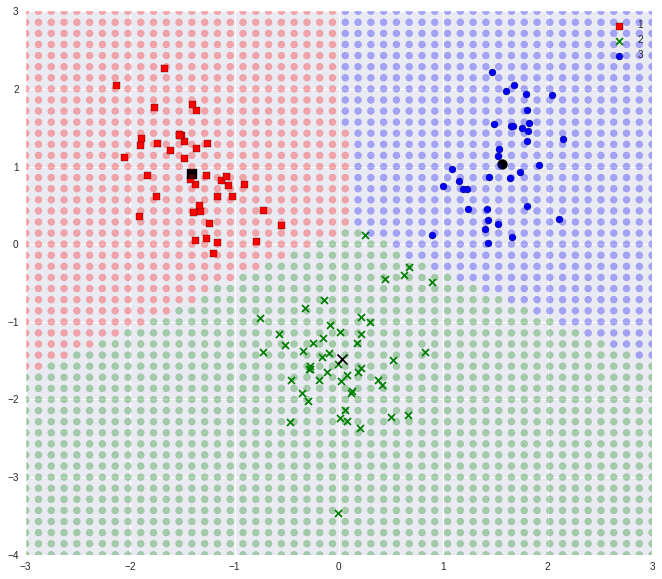

In [61]:
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)
for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')
# Plot the voronoi spaces
means = []
for m,target in zip(['s','x','o'],np.unique(y_train)):
    means.append(np.mean(Y[y_train==target],axis=0))
    ax0.scatter(np.mean(Y[y_train==target],axis=0)[0],np.mean(Y[y_train==target],axis=0)[1],marker=m,c='black',s=100)
   
mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3)) 
mesh = []
for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))
NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g','b'])        
predictions = NN.predict(np.array(mesh))
ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.3)
plt.show()